In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**I have done data analysis for this previously and I extracted every informaiton for this here**
(https://github.com/MahyarFardin/Data-Analyse/blob/data-analysis/Mall-Cutomers-Analyse/Mall_dataset_analysis.ipynb)

**So I will dive into the project**

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
frame=[]
frame=pd.get_dummies(data["Gender"],drop_first=True)

In [4]:
data=pd.concat([data.drop("Gender",axis=1),frame],axis=1)

In [5]:
data=data.drop("CustomerID",axis=1)

In [6]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


**In order to find the iptimal number I have to try differant clusterings lets first drop the columns to two in order to plot the data**

In [14]:
from sklearn.decomposition import PCA

In [20]:
pca=PCA(2)

In [21]:
pca_data=pd.DataFrame(pca.fit_transform(data))

<AxesSubplot:xlabel='0', ylabel='1'>

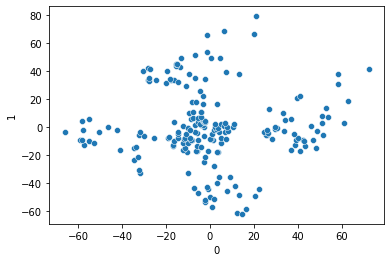

In [23]:
sns.scatterplot(x=pca_data[0],y=pca_data[1])

**looks like 5 clusters best suits, let's use elbow method to find the best clustering**

# Kmeans cluster

In [7]:
from sklearn.cluster import KMeans

In [43]:
inertia=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit(pca_data)
    inertia.append(km.inertia_)

# Elbow method

**we are going to calculate wcss and find the elbow**

<AxesSubplot:>

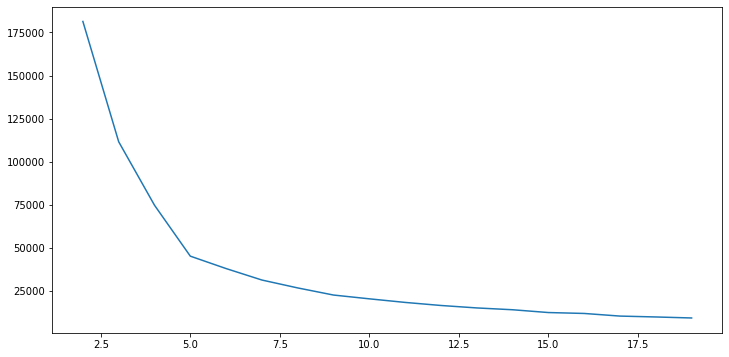

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(2,20),y=inertia)

**seems like my estimation was true**

In [37]:
km=KMeans(n_clusters=i)
km.fit(pca_data)
label=km.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

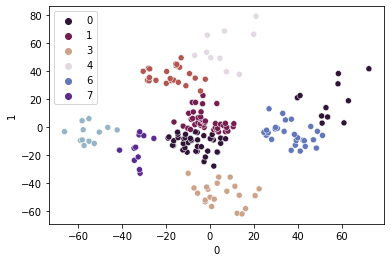

In [41]:
sns.scatterplot(x=pca_data[0],y=pca_data[1],hue=label,palette="twilight_shifted_r")